In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [7]:
! ls 'My Drive/2020/Courses Taken'

 all_stocks_5yr.csv  'Data Science'


In [8]:
## all_stocks_5yr.csv
import pandas as pd
data = pd.read_csv('My Drive/2020/Courses Taken/all_stocks_5yr.csv')
data.shape

(619040, 7)

In [9]:
# Top Five rows
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [10]:
data.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [11]:
### How many company's data we have here?
data.Name.nunique()

505

In [12]:
## Selecting the data AAL
df = data[data['Name']=='AAL']
df.shape

(1259, 7)

In [13]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [14]:
#select the columns date and close price
df = df[['date','close']]
df

,date,close
0,2013-02-08,14.75
1,2013-02-11,14.46
2,2013-02-12,14.27
3,2013-02-13,14.66
4,2013-02-14,13.99
...,...,...
1254,2018-02-01,53.88
1255,2018-02-02,52.10
1256,2018-02-05,49.76
1257,2018-02-06,51.18


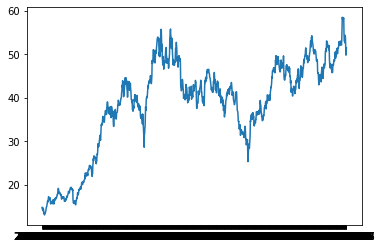

In [15]:
# Line plot
import matplotlib.pyplot as plt
plt.plot(df['date'],df['close'])

In [16]:
df.date[:10]

0    2013-02-08
1    2013-02-11
2    2013-02-12
3    2013-02-13
4    2013-02-14
5    2013-02-15
6    2013-02-19
7    2013-02-20
8    2013-02-21
9    2013-02-22
Name: date, dtype: object

In [17]:
### Missing values in the data
df.isnull().sum()

date     0
close    0
dtype: int64

In [18]:
## Preparing the data
## Features and target
## Input and output
## last 7 days data as input
## X -- [[d1-d7],[d9,d15],[d17,23]....]
## y -- [d8,d16,d24,...]

## X = [[d1-d7],[d2-d8],]
## y = [d8,d9]
X = [] ## input
y = [] ## ouput
for i  in range(df.shape[0]-7-1):   
  X.append(df['close'][i:i+7])# 0 -->[0:7], 1-->[1:8]
  y.append(df['close'][i+7])# 7,8,9
print(X[:2])

[0    14.75
1    14.46
2    14.27
3    14.66
4    13.99
5    14.50
6    14.26
Name: close, dtype: float64, 1    14.46
2    14.27
3    14.66
4    13.99
5    14.50
6    14.26
7    13.33
Name: close, dtype: float64]


In [19]:
import numpy as np
X = np.array(X)

In [20]:
df1  = pd.DataFrame(X,columns=['d1','d2','d3','d4','d5','d6','d7'])
df1.head()

,d1,d2,d3,d4,d5,d6,d7
0,14.75,14.46,14.27,14.66,13.99,14.50,14.26
1,14.46,14.27,14.66,13.99,14.50,14.26,13.33
2,14.27,14.66,13.99,14.50,14.26,13.33,13.37
3,14.66,13.99,14.50,14.26,13.33,13.37,13.57
4,13.99,14.50,14.26,13.33,13.37,13.57,13.02


In [21]:
df1['d8'] = y
df1.head()

,d1,d2,d3,d4,d5,d6,d7,d8
0,14.75,14.46,14.27,14.66,13.99,14.50,14.26,13.33
1,14.46,14.27,14.66,13.99,14.50,14.26,13.33,13.37
2,14.27,14.66,13.99,14.50,14.26,13.33,13.37,13.57
3,14.66,13.99,14.50,14.26,13.33,13.37,13.57,13.02
4,13.99,14.50,14.26,13.33,13.37,13.57,13.02,13.26


In [22]:
df1.shape

(1251, 8)

In [23]:
1251 * 0.8

1000.8000000000001

In [24]:
## Train test split
X_train = df1.iloc[0:1000,0:7]
X_test = df1.iloc[1000:,0:7]
y_train =  df1['d8'][:1000]
y_test  = df1['d8'][1000:]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1000, 7)
(1000,)
(251, 7)
(251,)


In [25]:
## Sacling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = pd.DataFrame(sc.transform(X_train),columns = X_train.columns)
X_test_sc = pd.DataFrame(sc.transform(X_test),columns = X_train.columns)
X_train_sc.describe()

,d1,d2,d3,d4,d5,d6,d7
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,5.107026e-17,1.179057e-16,3.196332e-16,8.437695e-18,-2.058353e-16,6.408207e-16,3.573808e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-2.119798e+00,-2.125939e+00,-2.132307e+00,-2.138824e+00,-2.145197e+00,-2.151939e+00,-2.158392e+00
25%,-5.582080e-01,-5.486430e-01,-5.493180e-01,-5.516601e-01,-5.450605e-01,-5.350756e-01,-5.332242e-01
50%,2.659776e-01,2.649882e-01,2.640589e-01,2.640761e-01,2.641178e-01,2.631759e-01,2.621305e-01
75%,6.620601e-01,6.644832e-01,6.649275e-01,6.633158e-01,6.633343e-01,6.668651e-01,6.666995e-01
max,1.847059e+00,1.847165e+00,1.847513e+00,1.847976e+00,1.848369e+00,1.848914e+00,1.849089e+00


In [26]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
model = Sequential()
# 256 cels
model.add(LSTM(256,input_shape=(7,1)))
# single neuron
model.add(Dense(1))
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(optimizer='adam',loss='mse')

In [28]:
X_test.shape

(251, 7)

In [29]:
# number of records , time steps,Features
X_train_sc = X_train_sc.values.reshape(1000,7,1)
X_test_sc = X_test_sc.values.reshape(251,7,1)

In [30]:
history = model.fit(X_train_sc,y_train,epochs=100,validation_data=(X_test_sc,y_test))

Train on 1000 samples, validate on 251 samples
Epoch 1/100
1000/1000 [==============================] - 2s 2ms/step - loss: 1024.7315 - val_loss: 623.2979
Epoch 2/100
1000/1000 [==============================] - 1s 1ms/step - loss: 224.8136 - val_loss: 286.3494
Epoch 3/100
1000/1000 [==============================] - 1s 1ms/step - loss: 119.7378 - val_loss: 186.8131
Epoch 4/100
1000/1000 [==============================] - 1s 1ms/step - loss: 112.9828 - val_loss: 164.1568
Epoch 5/100
1000/1000 [==============================] - 1s 1ms/step - loss: 99.9312 - val_loss: 152.4846
Epoch 6/100
1000/1000 [==============================] - 1s 1ms/step - loss: 34.3728 - val_loss: 89.5308
Epoch 7/100
1000/1000 [==============================] - 1s 1ms/step - loss: 19.9641 - val_loss: 59.2072
Epoch 8/100
1000/1000 [==============================] - 1s 1ms/step - loss: 12.8686 - val_loss: 37.7305
Epoch 9/100
1000/1000 [==============================] - 1s 1ms/step - loss: 9.1672 - val_loss: 29.0656

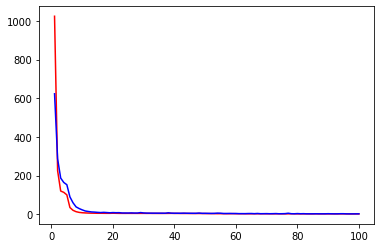

In [31]:
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
ep = list(range(1,101))
plt.plot(ep,tr_loss,color='r')
plt.plot(ep,val_loss,color='b')

In [32]:
model.predict(X_test_sc)

array([[44.792397],
       [45.01313 ],
       [45.45034 ],
       [45.85778 ],
       [46.548916],
       [46.629875],
       [46.95606 ],
       [46.849148],
       [46.821663],
       [46.66033 ],
       [46.377647],
       [46.10752 ],
       [45.961437],
       [45.964226],
       [46.049065],
       [46.38186 ],
       [46.121513],
       [46.293846],
       [45.737793],
       [45.26641 ],
       [44.771748],
       [43.962784],
       [43.662933],
       [42.87991 ],
       [42.010044],
       [41.56279 ],
       [41.601913],
       [41.739388],
       [41.688755],
       [41.105015],
       [40.531975],
       [40.580444],
       [41.11586 ],
       [41.572403],
       [42.048603],
       [42.133644],
       [42.27996 ],
       [42.24606 ],
       [42.310303],
       [41.711975],
       [41.2828  ],
       [41.19506 ],
       [41.46917 ],
       [41.874718],
       [42.7582  ],
       [43.51413 ],
       [43.682842],
       [43.822777],
       [43.760674],
       [43.990944],


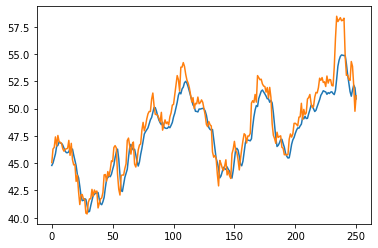

In [33]:
plt.plot(range(len(X_test_sc)),model.predict(X_test_sc).flat)
plt.plot(range(len(X_test_sc)),y_test)

In [34]:
X_test_sc[0].reshape(1,7,1)

array([[[0.83910218],
        [0.77719701],
        [0.75711333],
        [0.75193205],
        [0.7682191 ],
        [0.86976278],
        [0.85612661]]])

In [35]:
model.predict(X_test_sc[0].reshape(1,7,1))

array([[44.792404]], dtype=float32)

In [36]:
y_test[1000]

45.06

In [37]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
model2 = Sequential()
# 256 cels
model2.add(LSTM(256,input_shape=(7,1)))
model2.add(Dropout(0.3))
# single neuron
model2.add(Dense(1))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________


In [38]:
model2.compile(optimizer='adam',loss='mse')

In [39]:
history2 = model2.fit(X_train_sc,y_train,epochs=100,validation_data=(X_test_sc,y_test))

Train on 1000 samples, validate on 251 samples
Epoch 1/100
1000/1000 [==============================] - 2s 2ms/step - loss: 1019.5044 - val_loss: 628.5455
Epoch 2/100
1000/1000 [==============================] - 1s 1ms/step - loss: 244.3083 - val_loss: 289.2481
Epoch 3/100
1000/1000 [==============================] - 1s 1ms/step - loss: 121.3848 - val_loss: 186.9485
Epoch 4/100
1000/1000 [==============================] - 1s 1ms/step - loss: 116.3262 - val_loss: 165.4614
Epoch 5/100
1000/1000 [==============================] - 1s 1ms/step - loss: 111.9170 - val_loss: 160.9292
Epoch 6/100
1000/1000 [==============================] - 1s 1ms/step - loss: 51.5893 - val_loss: 107.0813
Epoch 7/100
1000/1000 [==============================] - 1s 1ms/step - loss: 26.5675 - val_loss: 70.6774
Epoch 8/100
1000/1000 [==============================] - 1s 1ms/step - loss: 18.2893 - val_loss: 49.9019
Epoch 9/100
1000/1000 [==============================] - 1s 1ms/step - loss: 13.3551 - val_loss: 34.4

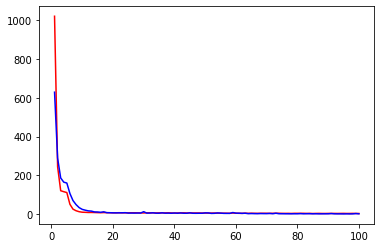

In [40]:
tr_loss = history2.history['loss']
val_loss = history2.history['val_loss']
ep = list(range(1,101))
plt.plot(ep,tr_loss,color='r')
plt.plot(ep,val_loss,color='b')

1. get the data
2.  what is the target
3. Take the target and observe downtrend or uptrend
4. Craete input(features) and ouputs(target)
5. Train_test_split
6. Apply scaling if it required
7. Reshape the inputs
8. Create a Model
9. Compile the model with the proper optimizer and loss
10. Metrics =['mse','mae']
11. Evaluate the model with test data
12. compare the results
13. Check for overfitting and underfitting
14. If It is an overfitted model apply dropout. or check another model
15. Check raw data